In [1]:
#importing all requried libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading a data into a dataframe


file_path = "Airline.csv"
url = "https://raw.githubusercontent.com/Akashkhatri-cs/Akashkhatri-cs/main/Airline.csv"

try:
    # Try to read from a local file path
    df_airline = pd.read_csv(file_path)

except FileNotFoundError:
    print(f"The file '{file_path}' was not found locally. Trying to read from the URL.")

    try:
        # Try to read from the URL
        df_airline = pd.read_csv(url)
    except Exception as e:
        print(f"Error occurred while reading from the URL: {e}")

In [3]:
## Viewing the dataset's initial few observations (rows/records) using the.head() function
df_airline.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Viewing the dataset's most recent observations, or records, with the help of the.tail() method 
df_airline.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
#To determine how many observations (rows or records) the dataset contains, use.shape.
# The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
# (row count, column count
df_airline.shape

(300153, 12)

In [490]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [491]:
# To view dataset metrics (count, mean, std, min, 25%, 50%, 75%, max), use.describe().
# The number of non-null observations, or rows, is called the count.
# The average value for the specified column is called the mean.
# Standard deviation, or Std, measures how deviant the results are from the mean.
# Min is the value's minimum amount.
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the value's maximum amount.
df_airline.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Prepare & Preprocess Data

#### Understand missing data that could skew the model

In [492]:
# Check the characteristics that lack values.
df_airline.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [493]:
#Showing Duplicate value count
df_airline.duplicated().sum()

0

In [494]:
#Finding the Different values of Airline
df_airline['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [495]:
#Finding the Different values of Airline
df_airline['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [496]:
#Dropping the unnecessary column - Unnamed: 0
df_airline_new = df_airline.drop(columns=['Unnamed: 0'])

In [497]:
df_airline_new

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [498]:
df_airline_new['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

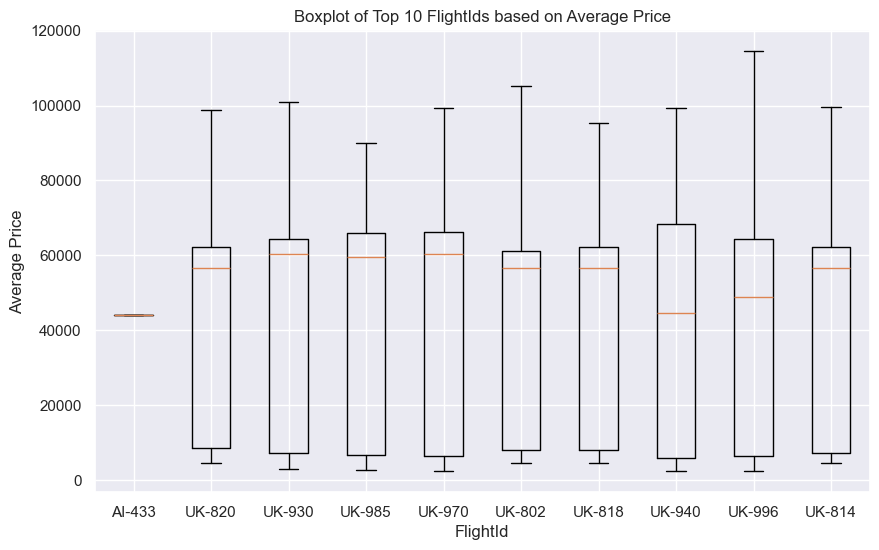

In [499]:
# Calculate the average price for each FlightId
average_prices = df_airline_new.groupby('flight')['price'].mean()

# Select the top 10 FlightIds based on average price
top_10_flight_ids = average_prices.nlargest(10).index

# Filter the dataset to include only the top 10 FlightIds
top_10_data = df_airline_new[df_airline_new['flight'].isin(top_10_flight_ids)]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([top_10_data[top_10_data['flight'] == flight_id]['price'] for flight_id in top_10_flight_ids],
            labels=top_10_flight_ids)
plt.title('Boxplot of Top 10 FlightIds based on Average Price')
plt.xlabel('FlightId')
plt.ylabel('Average Price')
plt.show()

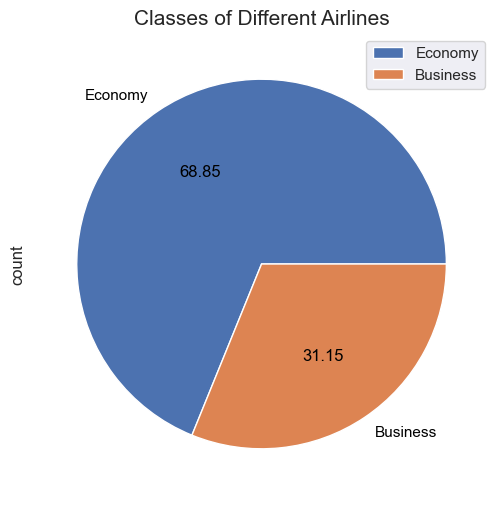

In [500]:
# Look at the percentages between classes and the price differences.
plt.figure(figsize=(8,6))
df_airline_new['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

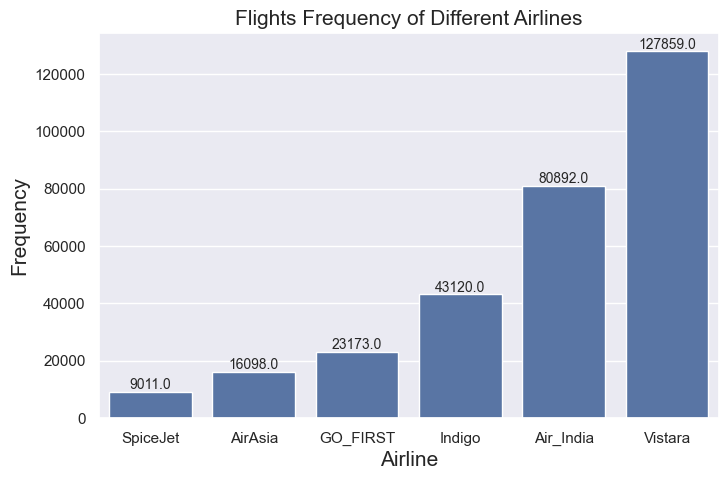

In [501]:
# Displays the number of flights between airlines and price comparisons.
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df_airline_new, x='airline', order=df_airline_new['airline'].value_counts().index[::-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom", fontsize=10)
plt.title('Flights Frequency of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

Text(0.5, 0, 'Airlines')

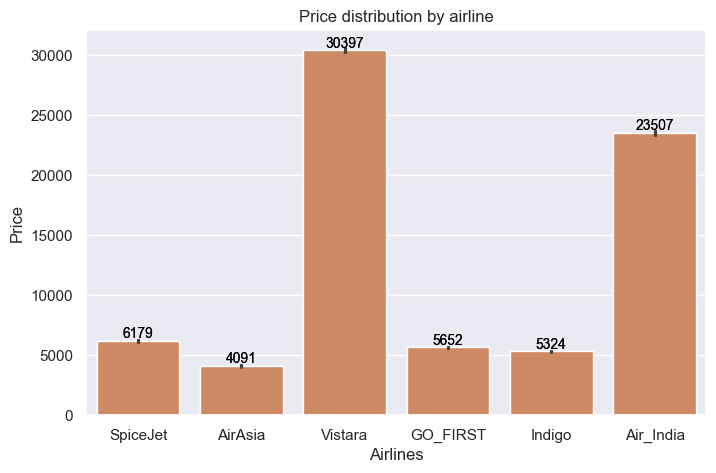

In [502]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plt.title("Price distribution by airline")
sns.barplot(x='airline', y='price', data=df_airline_new)
# Create the bar plot
ax = sns.barplot(x='airline', y='price', data=df_airline_new)
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.ylabel("Price")
plt.xlabel("Airlines")

In [503]:
#To summarize the relationship between the 'airline' column and the 'price' column, while also considering the 'class' column
df_airline_new.groupby(['airline', 'class'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()

,airline,class,mean,max,min,std,count
0,AirAsia,Economy,4091.072742,31917,1105,2824.055172,16098
1,Air_India,Business,47131.039212,90970,12000,10521.926556,32898
2,Air_India,Economy,7313.682169,42349,1526,3989.521406,47994
3,GO_FIRST,Economy,5652.007595,32803,1105,2513.865560,23173
4,Indigo,Economy,5324.216303,31952,1105,3268.894831,43120
5,SpiceJet,Economy,6179.278881,34158,1106,2999.630406,9011
6,Vistara,Business,55477.027777,123071,17604,13225.349062,60589
7,Vistara,Economy,7806.943645,37646,1714,3854.572559,67270


##### How does the ticket price varies with the type of airline?

Text(0, 0.5, 'Airlines')

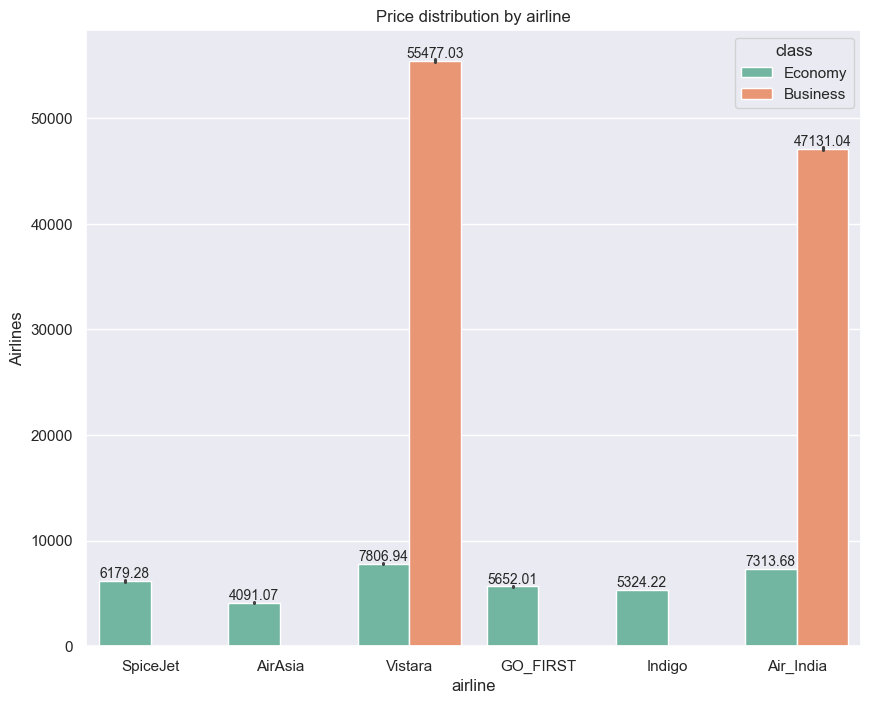

In [504]:
# Displaying a bar graph of price and airline with the class  
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
plt.title("Price distribution by airline")
ax = sns.barplot(x='airline', y='price', data=df_airline_new, palette="Set2", hue='class')
for p in ax.patches:
    height = p.get_height()
    if height != 0: 
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha="center", va="bottom", fontsize=10)
plt.ylabel("Price")
plt.ylabel("Airlines")

They affect flight costs when taken into account along with the airline and class. When it comes to economy class, AirAsia has the lowest average price while Vistara has the highest average price.

Airlines with the highest average price in Business class are Vistara, while Air India has the second lowest average price. Notably, there are just two airlines offering business class.

In [505]:
#Considering the 'class' column as well, the link between the'stop' and 'price' columns is summarised.
df_airline_new.groupby(['stops','class'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()


,stops,class,mean,max,min,std,count
0,one,Business,54687.377156,123071,20000,10622.569936,84302
1,one,Economy,6812.857800,42349,1105,3658.418081,166561
2,two_or_more,Business,70127.660203,117307,12000,12739.907274,1083
3,two_or_more,Economy,9142.264279,35145,1966,4704.906533,12203
4,zero,Business,27846.339052,59573,12000,6780.408368,8102
5,zero,Economy,4012.624615,21058,1105,2106.398792,27902


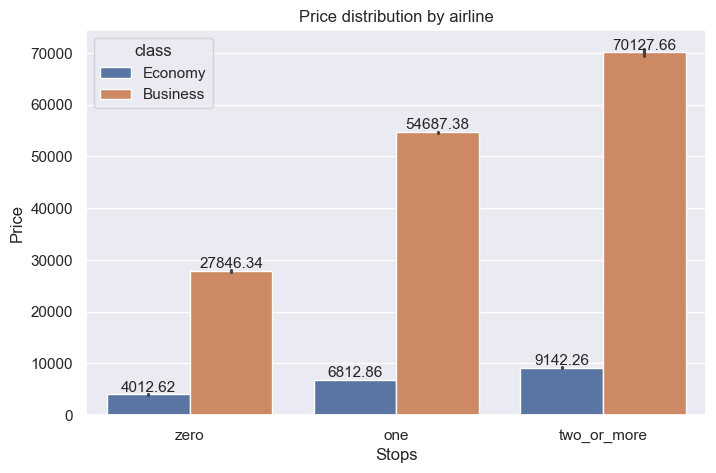

In [506]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plt.title("Price distribution by airline")
ax = sns.barplot(x='stops', y='price', data=df_airline_new, hue='class')

for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Check if the height is not zero
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height,
            f'{height:.2f}',
            ha="center",
            va="bottom",
            fontsize=11,
        )
        
plt.ylabel("Price")
plt.xlabel("Stops")
plt.show()

C:\Users\Akash\AppData\Local\Temp\ipykernel_13476\3425794003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airline_new, x="stops", y="duration",width=0.5,palette='Set3')


,stops,mean,max,min,std,count
0,one,13.496514,49.83,2.92,6.510456,250863
1,two_or_more,15.317141,49.83,3.92,7.392067,13286
2,zero,2.191324,3.58,0.83,0.500995,36004


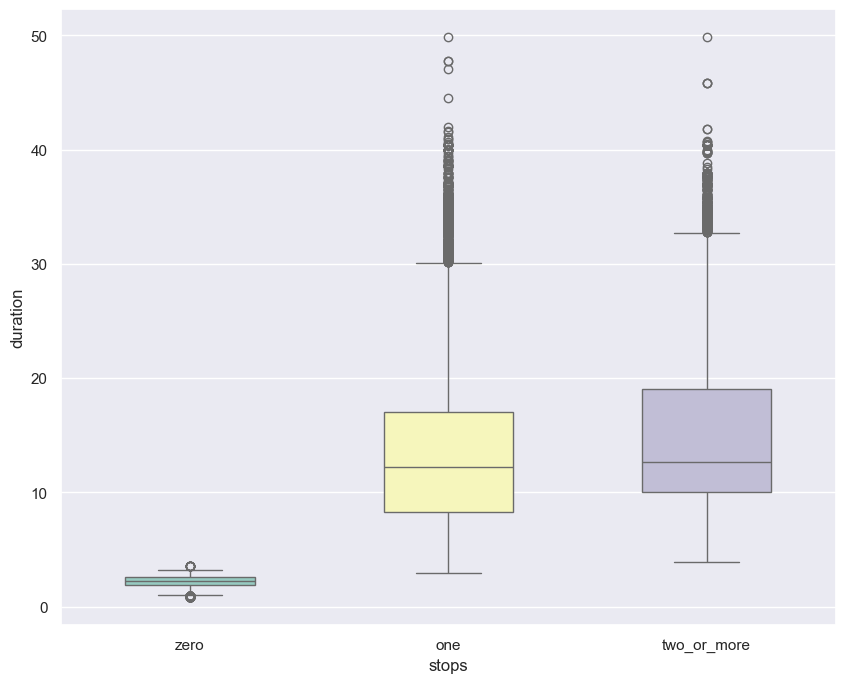

<Figure size 1000x800 with 0 Axes>

In [507]:
airlines_stops = df_airline_new.groupby(['stops'])['duration'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
sns.boxplot(data=df_airline_new, x="stops", y="duration",width=0.5,palette='Set3')
plt.figure(figsize=(10, 8))
airlines_stops

C:\Users\Akash\AppData\Local\Temp\ipykernel_13476\3629611374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time',y='price',data=df_airline_new,palette='Pastel2')


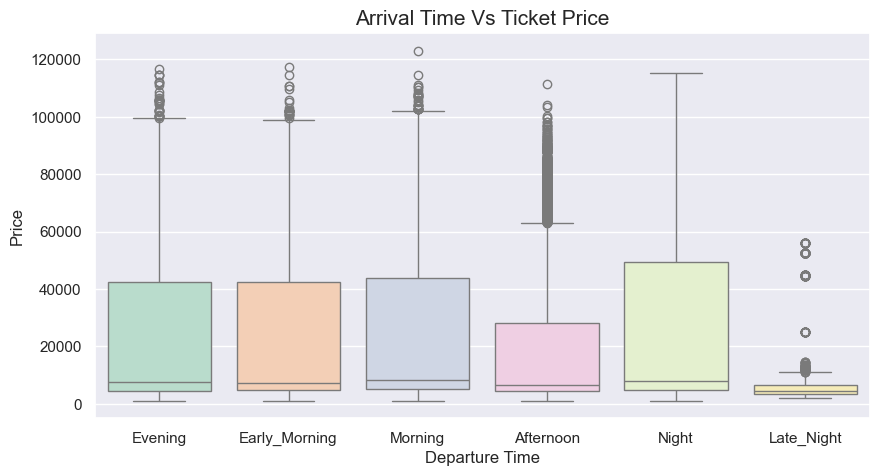

In [508]:
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time',y='price',data=df_airline_new,palette='Pastel2')
plt.title('Arrival Time Vs Ticket Price',fontsize=15)
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.show()

C:\Users\Akash\AppData\Local\Temp\ipykernel_13476\1367997496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time',y='price',data=df_airline_new,palette='Pastel2')


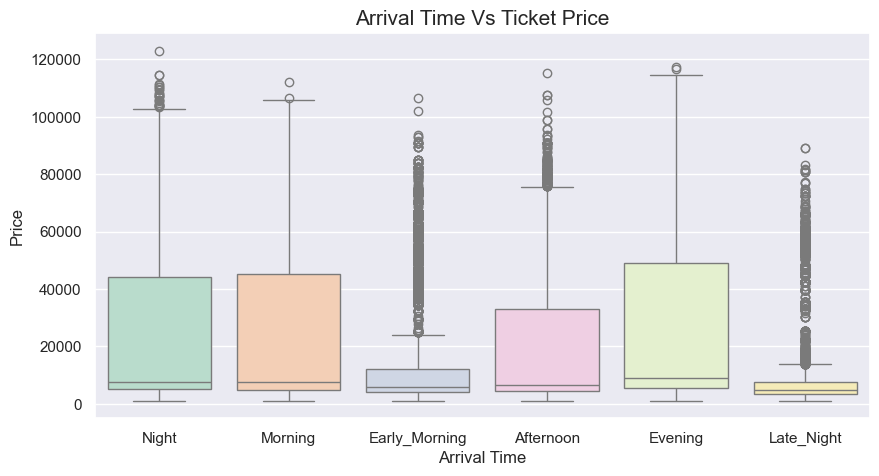

In [509]:
plt.figure(figsize=(10,5))
sns.boxplot(x='arrival_time',y='price',data=df_airline_new,palette='Pastel2')
plt.title('Arrival Time Vs Ticket Price',fontsize=15)
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.show()

##### How does the ticket price affected when tickets are bought in 1 or 2 days before departure?

Text(0.5, 0, 'Days Left')

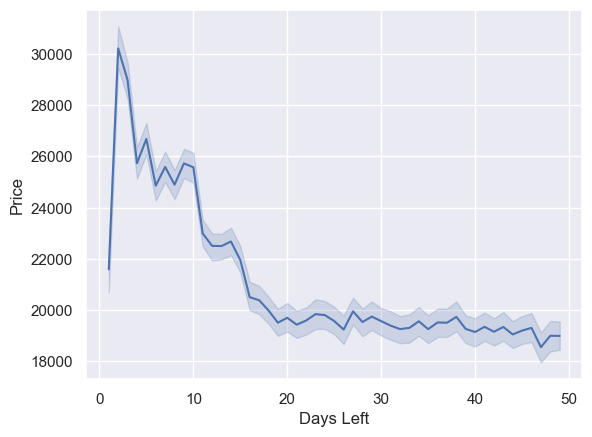

In [510]:
#To encapsulate the connection between the price and the "days_left" columns
sns.set_style("darkgrid")
sns.lineplot(data=df_airline_new, x="days_left", y="price")
plt.ylabel("Price")
plt.xlabel("Days Left")

The graph illustrates a gradual increase in prices until 20 days before the flight, followed by a significant drop just one day prior, resulting in prices up to three times cheaper. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes.

##### How does the ticket price changes with change in Source city and Destination city?

<Figure size 1000x800 with 0 Axes>

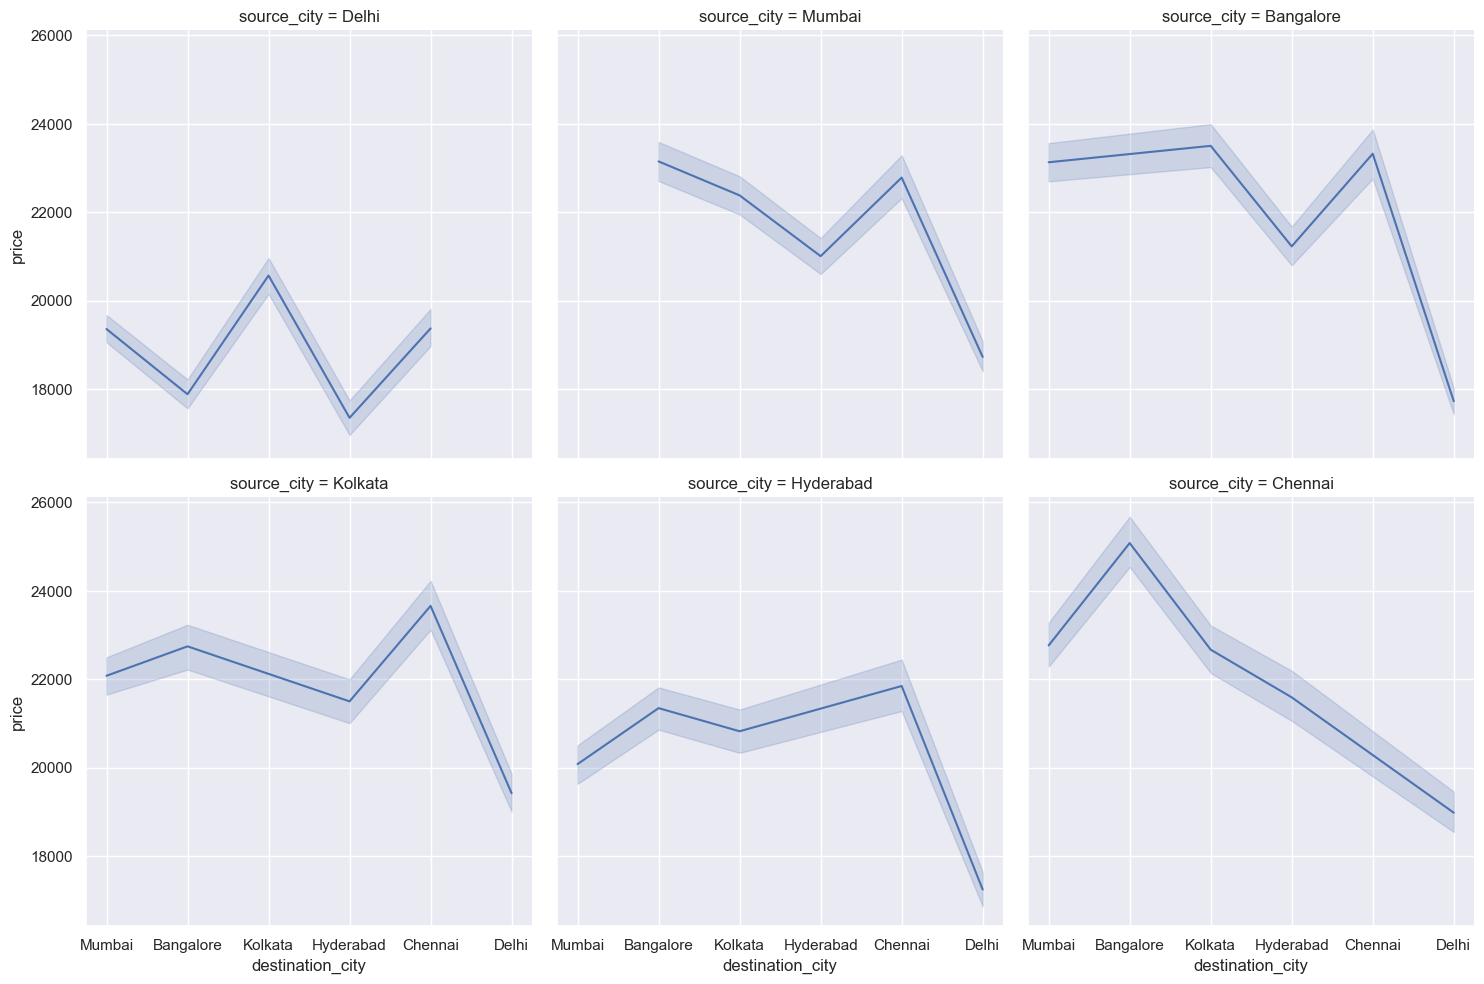

In [511]:
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df_airline_new, col_wrap=3)

From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the high priced.

### Outliers

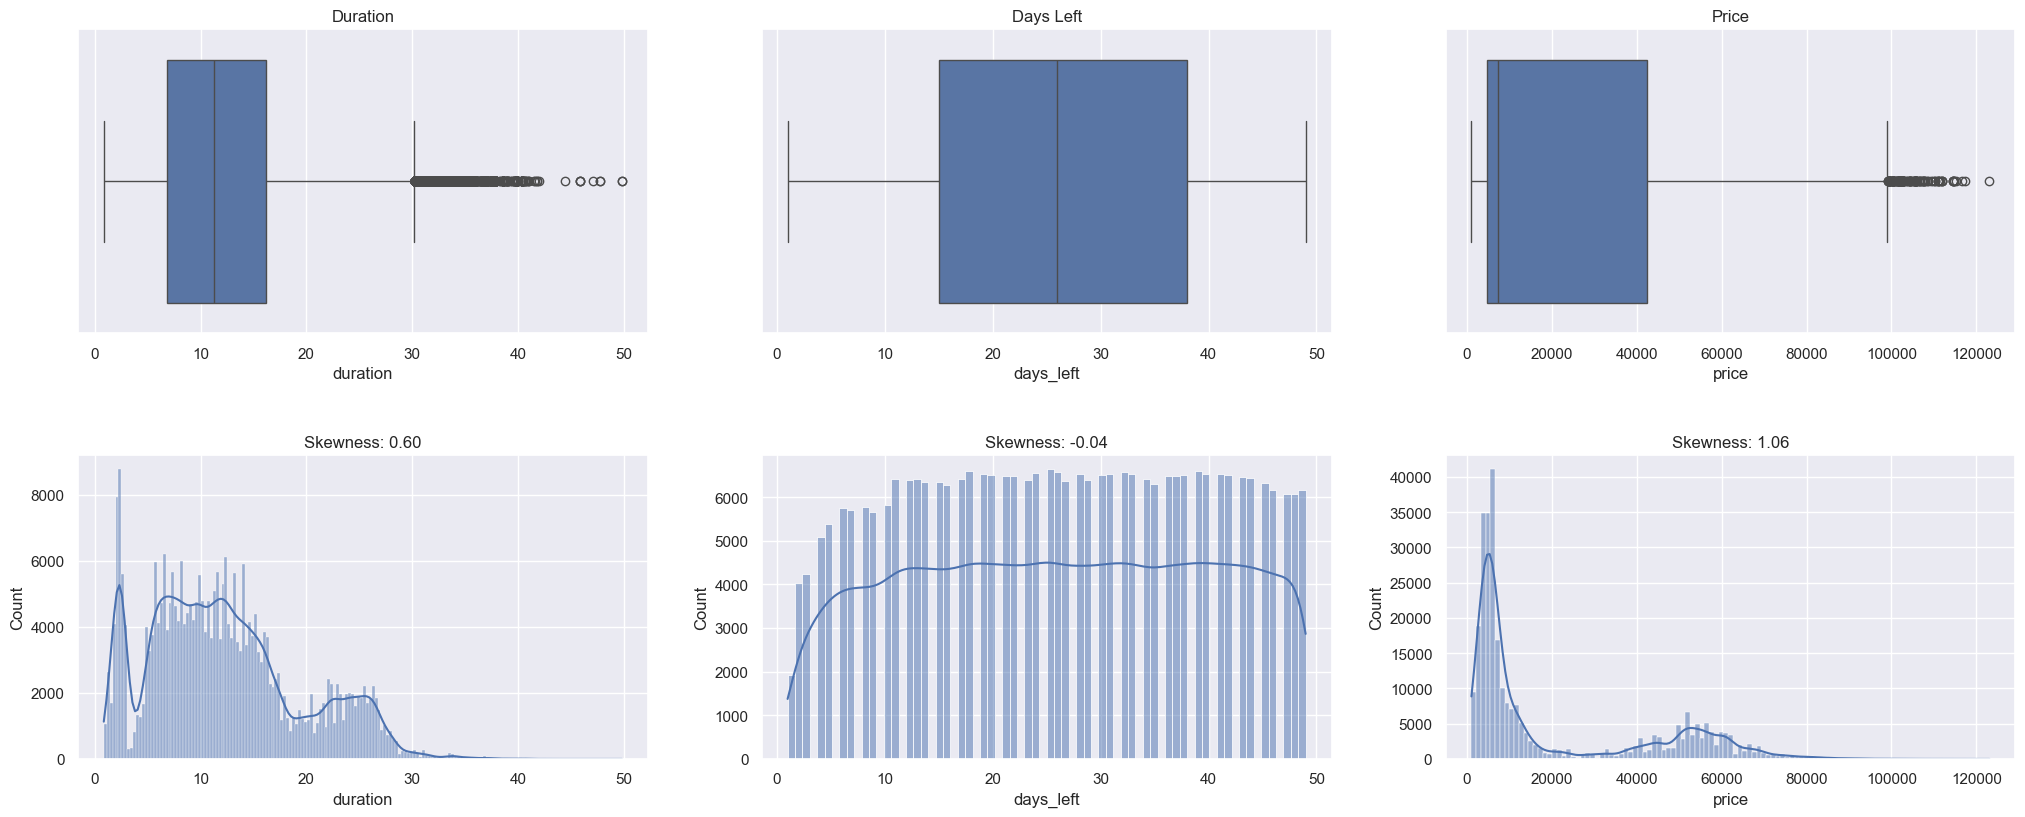

In [512]:
# Create a figure with subplots
plt.figure(figsize=(25, 15))

# Create a grid for subplots
grid = plt.GridSpec(3, 3, hspace=0.4)

# Subplot 1: Box Plot and Skewness Plot for Duration
plt.subplot(grid[0, 0])
sns.boxplot(x=df_airline_new["duration"], data=df_airline_new)
plt.title("Duration")

plt.subplot(grid[1, 0])
sns.histplot(df_airline_new["duration"], kde=True)
plt.title("Skewness: {:.2f}".format(df_airline_new["duration"].skew()))

# Subplot 2: Box Plot and Skewness Plot for Days Left
plt.subplot(grid[0, 1])
sns.boxplot(x=df_airline_new["days_left"], data=df_airline_new)
plt.title("Days Left")

plt.subplot(grid[1, 1])
sns.histplot(df_airline_new["days_left"], kde=True)
plt.title("Skewness: {:.2f}".format(df_airline_new["days_left"].skew()))

# Subplot 3: Box Plot and Skewness Plot for Price
plt.subplot(grid[0, 2])
sns.boxplot(x=df_airline_new["price"], data=df_airline_new)
plt.title("Price")

plt.subplot(grid[1, 2])
sns.histplot(df_airline_new["price"], kde=True)
plt.title("Skewness: {:.2f}".format(df_airline_new["price"].skew()))

plt.show()

Based on the plot shown above, it's evident that target variable 'price' exhibits a positive skew, primarily driven by the 'Business' class on top of that, we're retaining the outlier values in the  target variable, 'price', because they are primarily influenced by the 'class' feature, where business class prices are notably higher than economy class prices. The skewness in duration is primarily affected by the number of stops, which includes 'zero,' 'one,' and 'two_or_more'.

In [513]:
df_airline_new = df_airline_new.drop(columns=['flight'])

### Label encoding is a technique used to convert categorical data

In [514]:
# Display unique values before label encoding
for col in df_airline_new.select_dtypes(include=['object']).columns:
    unique_values = df_airline_new[col].unique()
    print(f"{col}: {unique_values}")

# Label encoding
for col in df_airline_new.select_dtypes(include=['object']).columns:
    df_airline_new[col].fillna('unknown', inplace=True)
    df_airline_new[col] = preprocessing.LabelEncoder().fit_transform(df_airline_new[col].astype(str))
    print(f"{col}: {df_airline_new[col].unique()}")

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']
airline: [4 0 5 2 3 1]
source_city: [2 5 0 4 3 1]
departure_time: [2 1 4 0 5 3]
stops: [2 0 1]
arrival_time: [5 4 1 0 2 3]
destination_city: [5 0 4 3 1 2]
class: [1 0]


In [515]:
df_airline_new.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


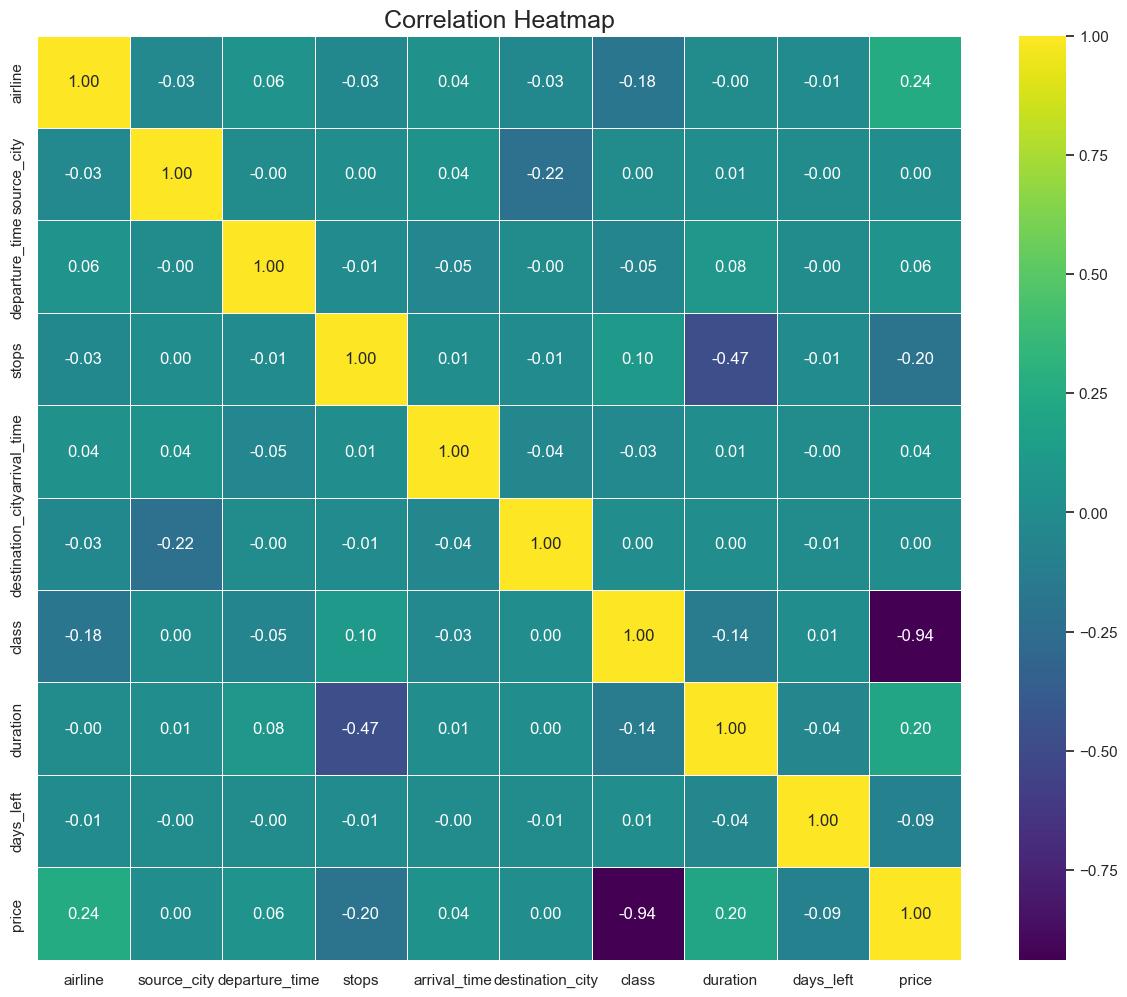

In [516]:
# Set a custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Create the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df_airline_new.corr(), fmt='.2f', annot=True, cmap=custom_palette, linewidths=0.5, square=True)

# Add a title
plt.title('Correlation Heatmap', fontsize=18)

plt.show()

In [517]:
# To perform feature selection with the F-statistic (ANOVA) method, we will use the `f_regression` function from scikit-learn. 


# Split the dataset into features (X) and the target variable (Y)
Y = df_airline_new["price"]
X = df_airline_new.drop(["price"], axis=1)

# Feature selection using F-statistic (ANOVA)
total_number_feature = 6  # Number of features to select
selected_features = SelectKBest(f_regression, k=total_number_feature).fit(X, Y)

# Get the indices of the selected features
selected_indexes_of_feature = selected_features.get_support(indices=True)

# Display the selected features and their indices
selected_feature_names = X.columns[selected_indexes_of_feature]
print("Selected features:", selected_feature_names)

# Selected features' data
selected_data = X[selected_feature_names]
print(selected_data.head())



Selected features: Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')
   airline  departure_time  stops  class  duration  days_left
0        4               2      2      1      2.17          1
1        4               1      2      1      2.33          1
2        0               1      2      1      2.17          1
3        5               4      2      1      2.25          1
4        5               4      2      1      2.33          1


In [518]:
# Droping the unselected features 
features_to_drop = [col for col in df_airline_new.columns if col not in selected_feature_names and col != 'price']
df_airline_new.drop(features_to_drop, axis=1, inplace=True)
df_airline_new

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955
...,...,...,...,...,...,...,...
300148,5,4,0,0,10.08,49,69265
300149,5,0,0,0,10.42,49,77105
300150,5,1,0,0,13.83,49,79099
300151,5,1,0,0,10.00,49,81585


In [519]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kc.fit(df_airline_new)
cluster_labels = kc.labels_

data_c = df_airline_new.assign(K_Cluster = cluster_labels)
data_label=df_airline_new.assign(K_Cluster = cluster_labels)

d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


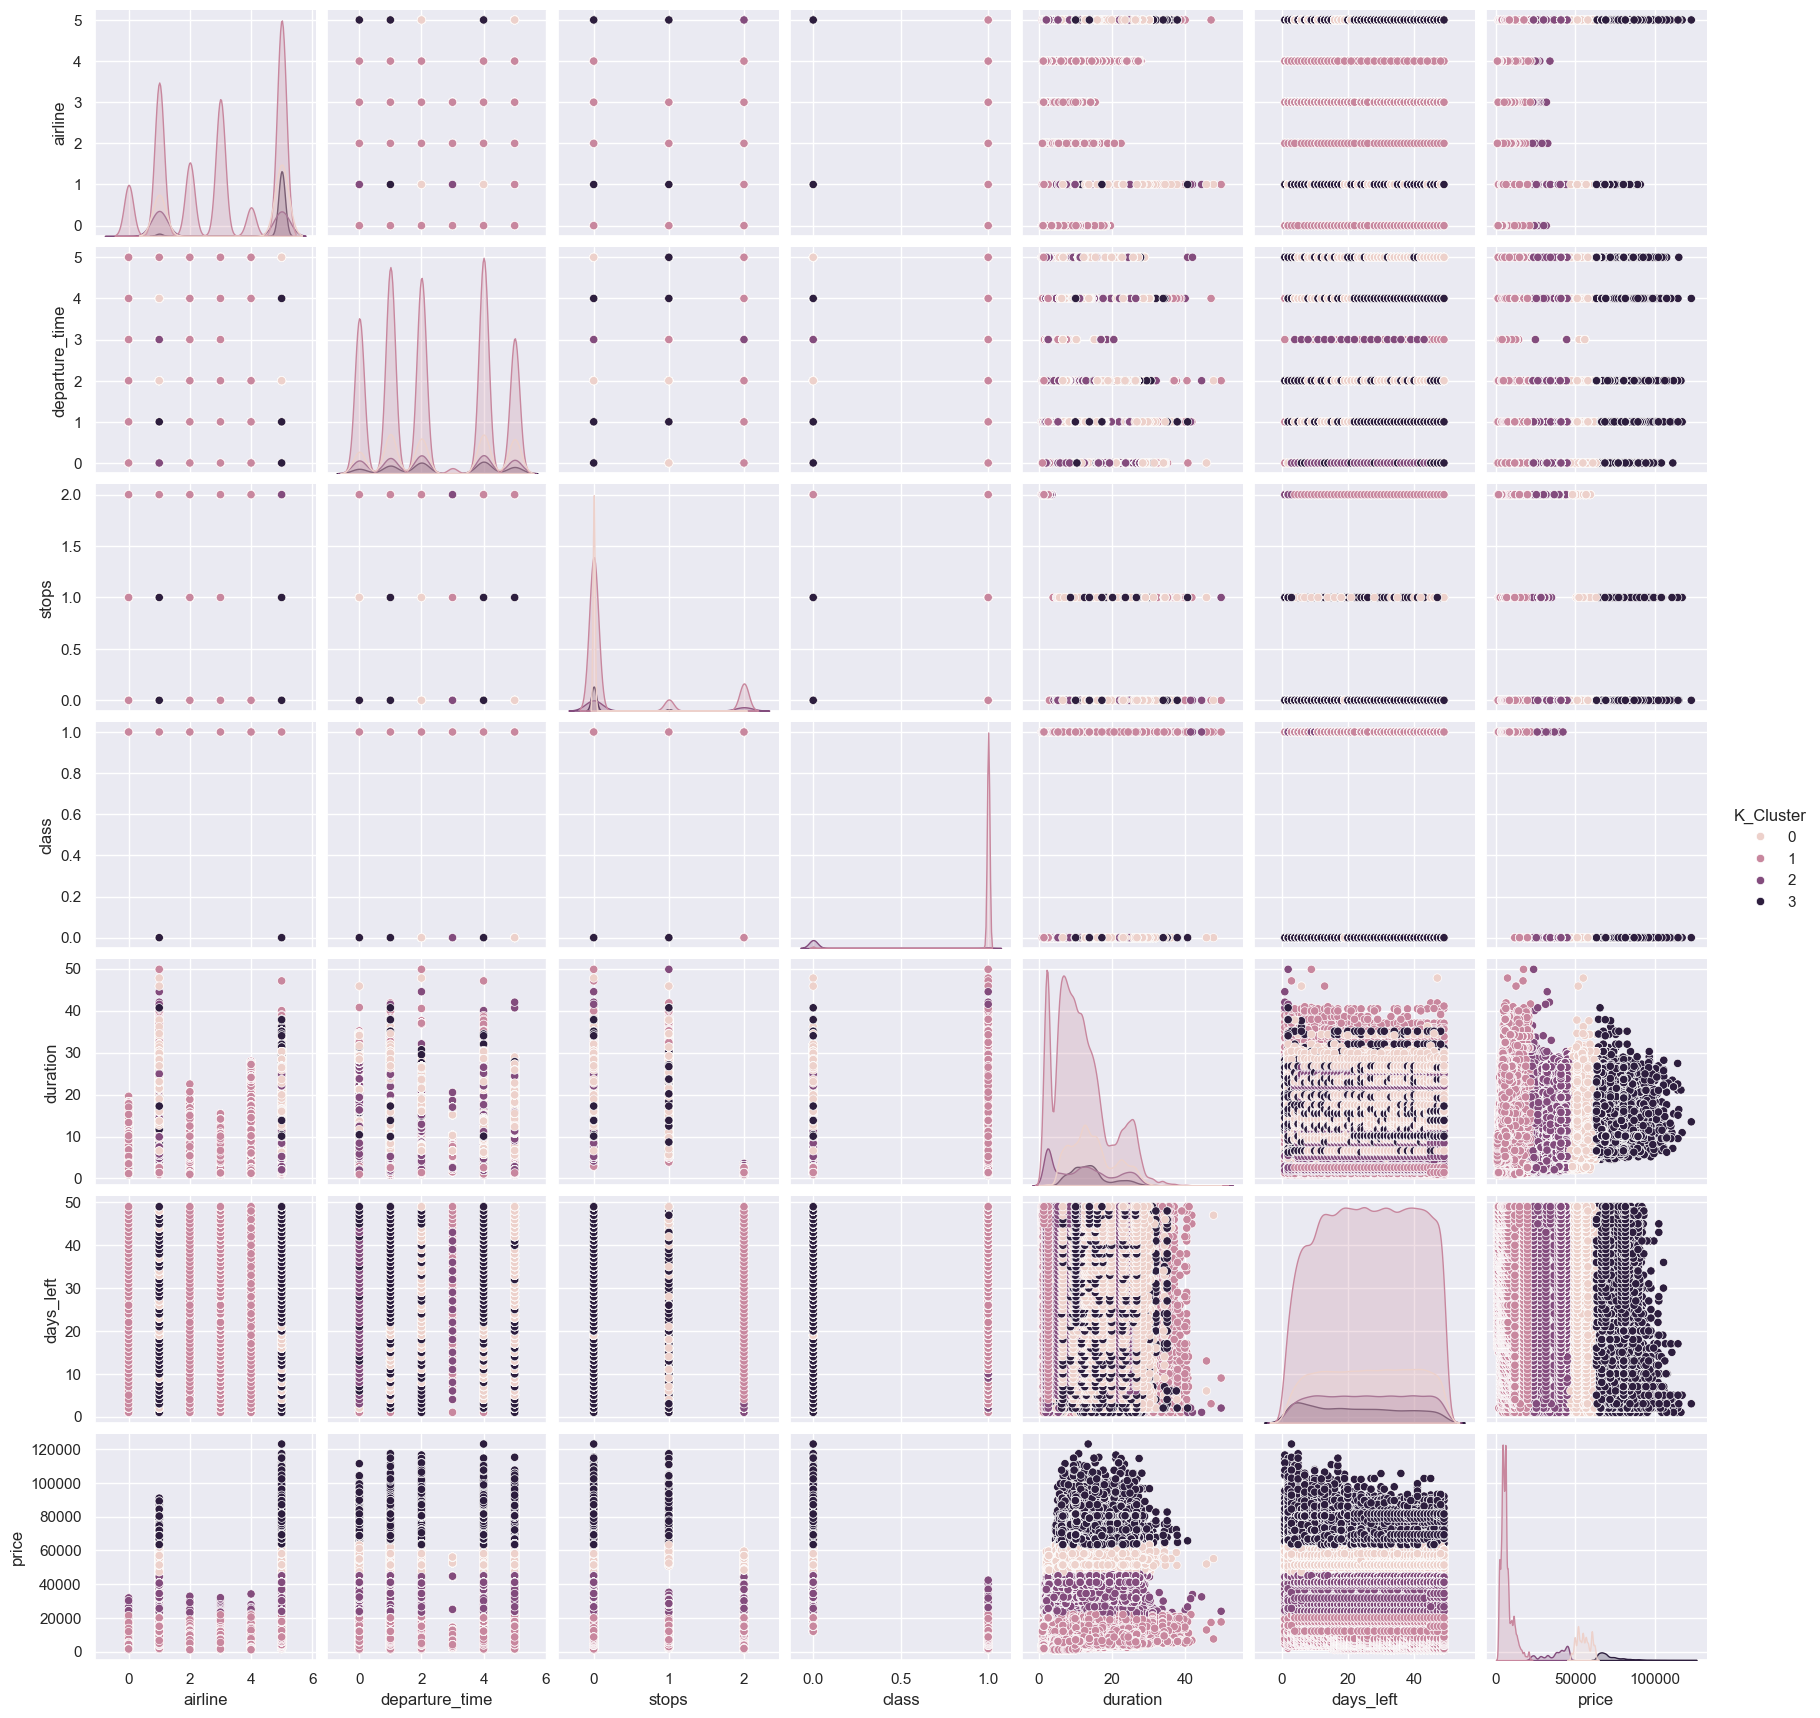

In [521]:
sns.pairplot(data=data_c, hue='K_Cluster')

### KMean Clustering

In [522]:
from sklearn.metrics import silhouette_score
def kmeanplot():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for subplots

    # Flatten the 2D array of subplots to access each subplot individually
    axes = axes.flatten()

    for i, n_cluster in enumerate(range(2, 8)):
        kmeans = KMeans(n_clusters=n_cluster, random_state=142)
        clusters = kmeans.fit_predict(df_airline_new)
        centroids = kmeans.cluster_centers_
        # label = kmeans.labels_
        # silhouette_avg = silhouette_score(df_airline_new, label)

        # Plot data points
        axes[i].scatter(df_airline_new.iloc[:, df_airline_new.columns.get_loc('duration')],
                        df_airline_new.iloc[:, df_airline_new.columns.get_loc('price')],
                        c=clusters, cmap='viridis', label='Data Points')

        # Plot centroids
        axes[i].scatter(centroids[:, df_airline_new.columns.get_loc('duration')],
                        centroids[:, df_airline_new.columns.get_loc('price')],
                        marker='X', s=200, color='red', label='Centroids')

        axes[i].set_title(f'K-Means Clustering (k={n_cluster})')
        axes[i].set_xlabel('Duration')
        axes[i].set_ylabel('Price')
    # Adjust layout to prevent overlap
    plt.legend()
    plt.tight_layout()
    plt.show()

d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\

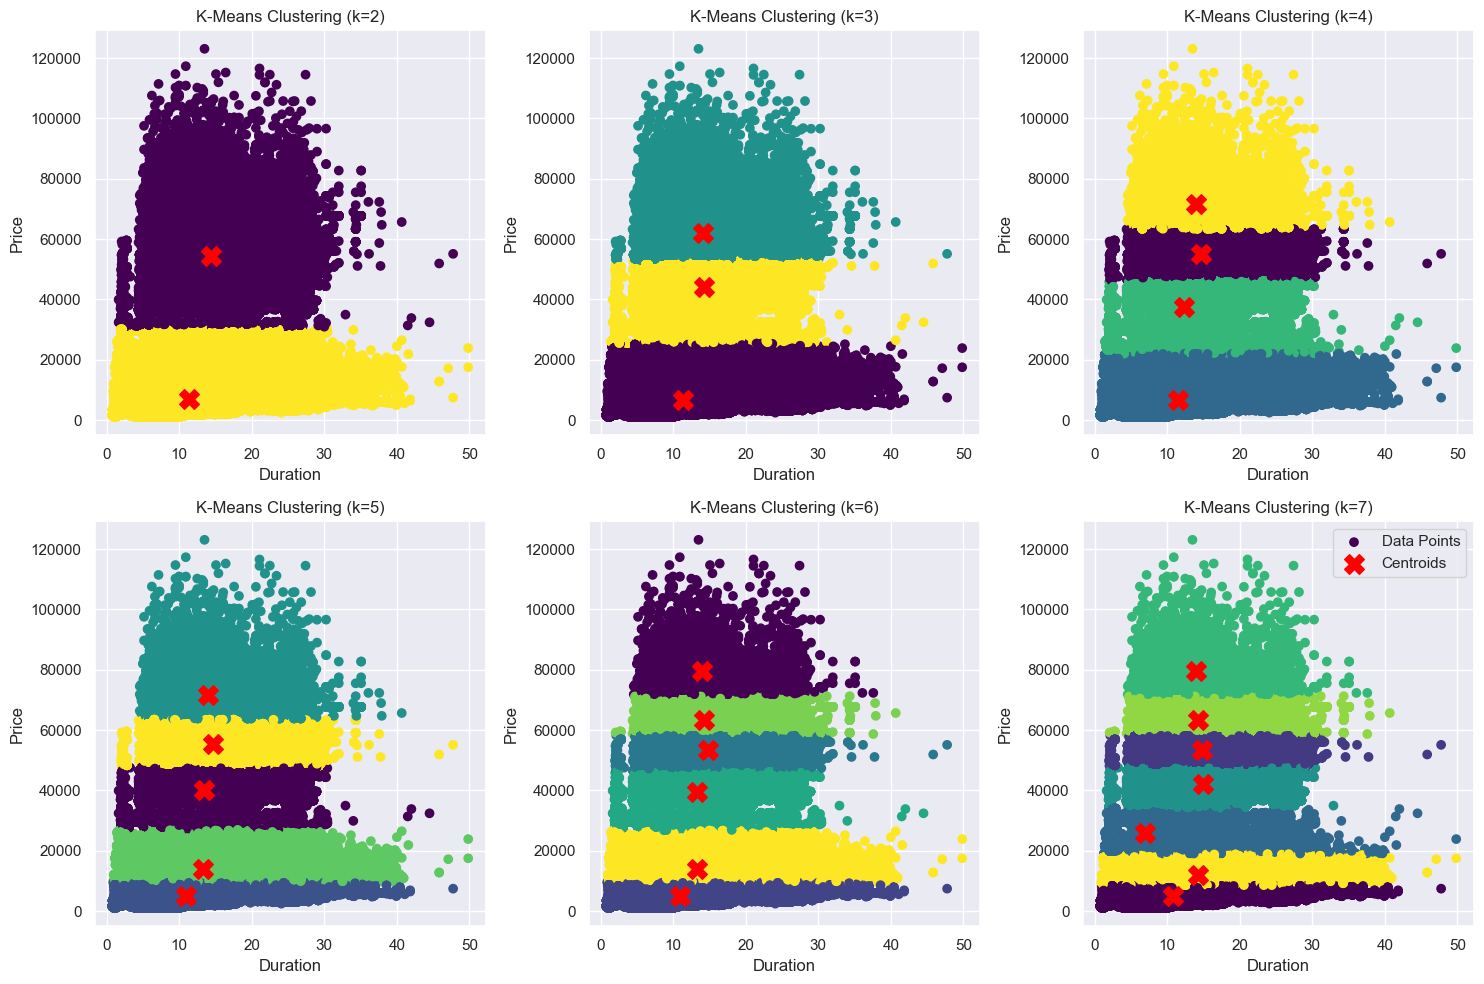

In [523]:

kmeanplot()



d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\cluster\

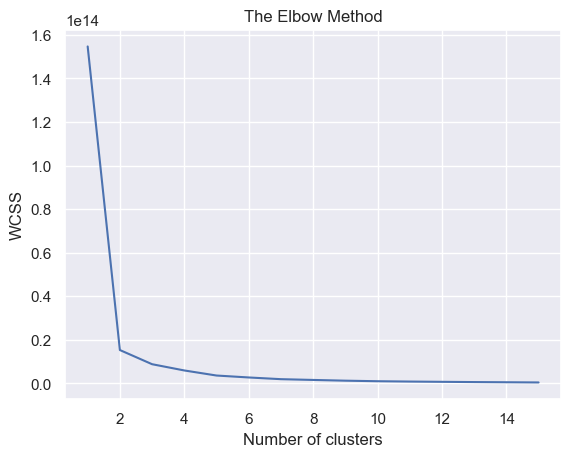

In [525]:
# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 15
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_airline_new)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [526]:
# The fit_transform method of the MinMaxScaler scales the data within the specified range (0 to 1 by default) for each of the selected columns.



# Custom new minimum and maximum values
min_new = 0
max_new = 1  # Set your desired maximum value

minDuration = df_airline_new['duration'].min()
maxDuration = df_airline_new['duration'].max()
minDaysLeft = df_airline_new['days_left'].min()
maxDaysLeft = df_airline_new['days_left'].max()
minPrice = df_airline_new['price'].min()
maxPrice = df_airline_new['price'].max()
#above are for later use. 

In [527]:
 # Create the MinMaxScaler with custom feature_range(numerical only)
scaler = MinMaxScaler(feature_range=(min_new, max_new))

 # List of numerical columns to scale
numerical_columns = ['duration', 'days_left', 'price']

 # Apply min-max scaling to the specified columns in flightdf
df_airline_new[numerical_columns] = scaler.fit_transform(df_airline_new[numerical_columns])

 # Display the scaled DataFrame
df_airline_new

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,0.027347,0.0,0.039749
1,4,1,2,1,0.030612,0.0,0.039749
2,0,1,2,1,0.027347,0.0,0.039773
3,5,4,2,1,0.028980,0.0,0.039765
4,5,4,2,1,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,5,4,0,0,0.188776,1.0,0.558844
300149,5,0,0,0,0.195714,1.0,0.623124
300150,5,1,0,0,0.265306,1.0,0.639473
300151,5,1,0,0,0.187143,1.0,0.659856


In [528]:
Y = df_airline_new["price"]
X = df_airline_new.drop(["price"], axis=1)

In [529]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

In [530]:
def train_predict_evaluate_model(model, model_name, X_train, Y_train, X_test, Y_test):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on the training set
    Y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    Y_test_pred = model.predict(X_test)
    
    # Create DataFrames for visualization
    df_train = pd.DataFrame({'Actual': Y_train.to_numpy().flatten(), 'Predicted': Y_train_pred.flatten()})
    df_test = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_test_pred.flatten()})
    
    # Visualize the results (bar plot)
    df1_train = df_train.head(25)
    df1_test = df_test.head(25)
    
    plt.figure(figsize=(16, 10))
    plt.subplot(2, 1, 1)
    plt.bar(df1_train.index, df1_train['Actual'], label='Actual')
    plt.bar(df1_train.index, df1_train['Predicted'], label='Predicted', alpha=0.7)
    plt.title(f'{model_name} - Training Set')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.bar(df1_test.index, df1_test['Actual'], label='Actual')
    plt.bar(df1_test.index, df1_test['Predicted'], label='Predicted', alpha=0.7)
    plt.title(f'{model_name} - Testing Set')
    plt.legend()
    
    plt.show()
    
    # Evaluate the model on both train and test sets
    metrics = {
        'Train_MSE': mean_squared_error(Y_train, Y_train_pred),
        'Train_RMSE': np.sqrt(mean_squared_error(Y_train, Y_train_pred)),
        'Train_MAE': np.sqrt(mean_absolute_error(Y_train, Y_train_pred)),
        'Train_R2': r2_score(Y_train, Y_train_pred),
        'Test_MSE': mean_squared_error(Y_test, Y_test_pred),
        'Test_RMSE': np.sqrt(mean_squared_error(Y_test, Y_test_pred)),
        'Test_MAE': np.sqrt(mean_absolute_error(Y_test, Y_test_pred)),
        'Test_R2': r2_score(Y_test, Y_test_pred),
    }
    
    return Y_train_pred, Y_test_pred, metrics


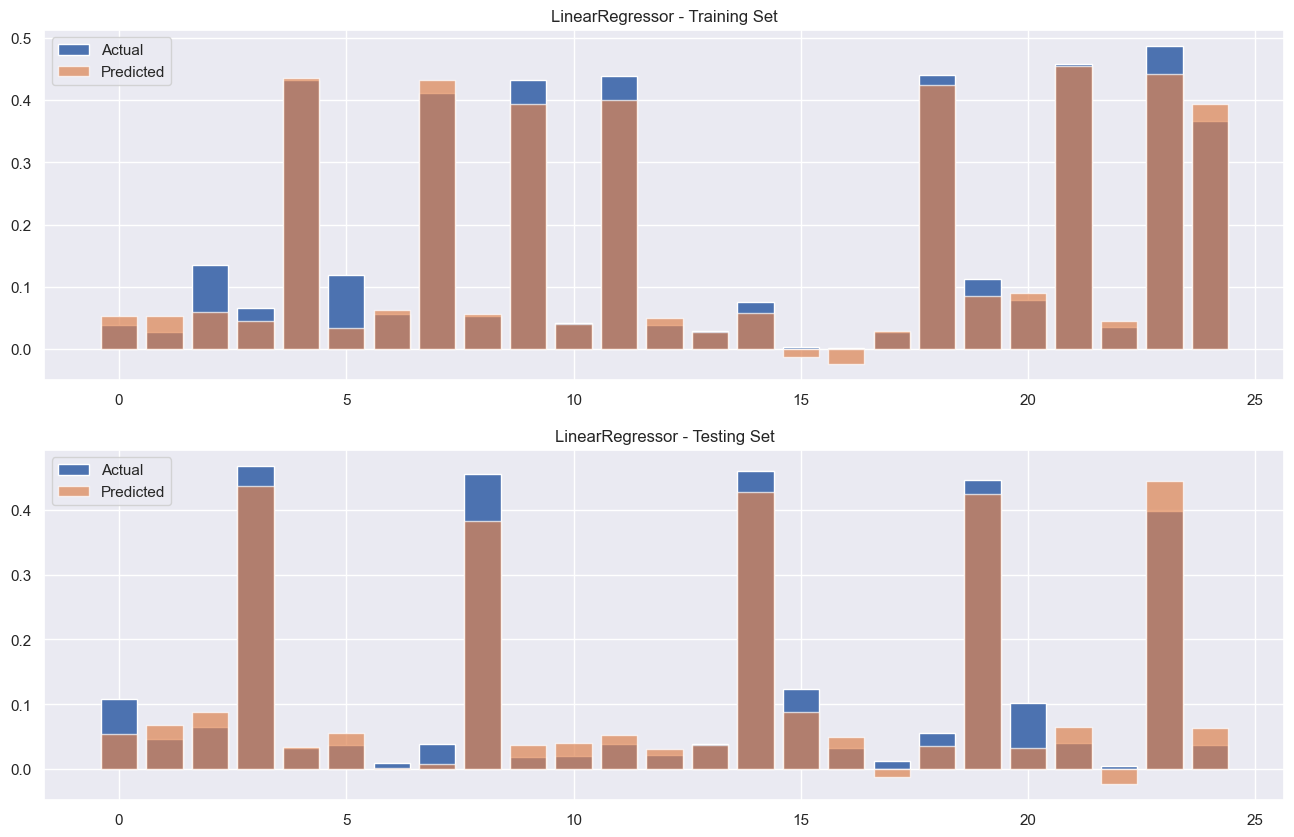

In [531]:
# Model 1: Linear Regressor
lrm = LinearRegression()
train_pred_lrm, test_pred_lrm, lrm_metrics = train_predict_evaluate_model(lrm, 'LinearRegressor', X_train, Y_train, X_test, Y_test)


In [532]:
lrm_metrics

{'Train_MSE': 0.0033013255401513533,
 'Train_RMSE': 0.05745716265315712,
 'Train_MAE': 0.19482698386814604,
 'Train_R2': 0.9045879116629061,
 'Test_MSE': 0.003369531482254128,
 'Test_RMSE': 0.05804766560555324,
 'Test_MAE': 0.1955350223323652,
 'Test_R2': 0.9030651082662826}

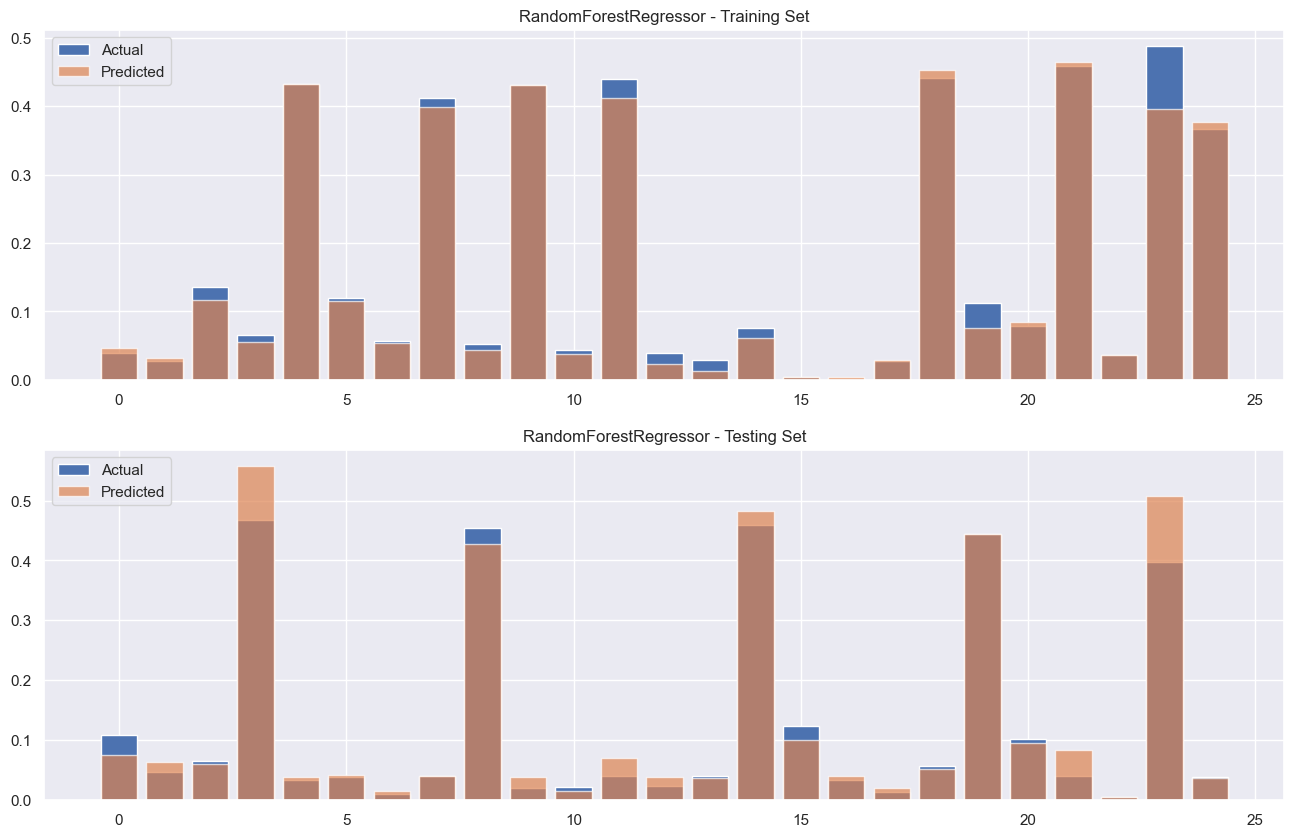

In [533]:
# Model 2: RandomForest Regressor
rfr = RandomForestRegressor(n_estimators=50, random_state=0)
train_pred_rfr, test_pred_rfr, rfr_metrics = train_predict_evaluate_model(rfr, 'RandomForestRegressor', X_train, Y_train, X_test, Y_test)

In [534]:
rfr_metrics

{'Train_MSE': 0.0006744023537283002,
 'Train_RMSE': 0.02596925785863547,
 'Train_MAE': 0.11292681893970838,
 'Train_R2': 0.980508999743867,
 'Test_MSE': 0.0017920801975163153,
 'Test_RMSE': 0.04233296821056037,
 'Test_MAE': 0.148926740469656,
 'Test_R2': 0.9484453251618911}

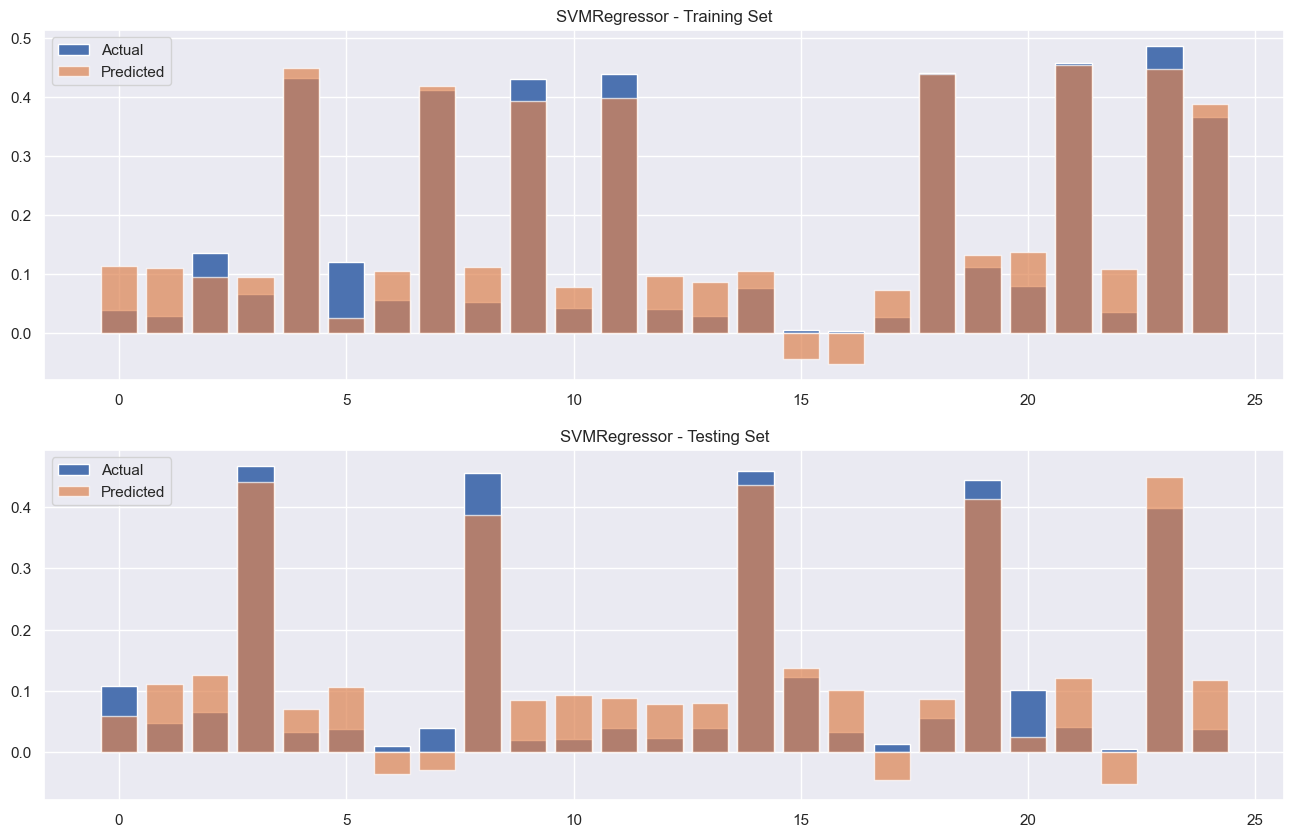

In [535]:
# Model 3: SVM Regressor
svm = SVR(kernel='linear')
train_pred_svm, test_pred_svm, svm_metrics = train_predict_evaluate_model(svm, 'SVMRegressor', X_train, Y_train, X_test, Y_test)

In [536]:
svm_metrics

{'Train_MSE': 0.004849876908939563,
 'Train_RMSE': 0.06964105763800234,
 'Train_MAE': 0.24312982067812036,
 'Train_R2': 0.8598330039155851,
 'Test_MSE': 0.004925120145837709,
 'Test_RMSE': 0.070179200236521,
 'Test_MAE': 0.24357352594844364,
 'Test_R2': 0.8583138366189267}

In [537]:
model_dfs = []
model_names = ['LinearRegressor', 'RandomForestRegressor', 'SVMRegressor']
for name, metrics in zip(model_names, [lrm_metrics,rfr_metrics,svm_metrics]):
    metrics['Model'] = name
    model_dfs.append(pd.DataFrame([metrics]))

# Concatenate DataFrames to create a comparison table
comparison_table = pd.concat(model_dfs, ignore_index=True)

# Display the comparison table
comparison_table

,Train_MSE,Train_RMSE,Train_MAE,Train_R2,Test_MSE,Test_RMSE,Test_MAE,Test_R2,Model
0,0.003301,0.057457,0.194827,0.904588,0.003370,0.058048,0.195535,0.903065,LinearRegressor
1,0.000674,0.025969,0.112927,0.980509,0.001792,0.042333,0.148927,0.948445,RandomForestRegressor
2,0.004850,0.069641,0.243130,0.859833,0.004925,0.070179,0.243574,0.858314,SVMRegressor


In [540]:
def estimate_ticket_cost(airline_name, departure_timing, number_of_stops, travel_class, flight_duration, days_until_departure):
    # Encode the categorical features
    airline_mapping = {'SpiceJet': 4, 'AirAsia': 0, 'Vistara': 5, 'Go_First': 2, 'Indigo': 3, 'Air_India': 1}
    departure_time_mapping = {'Morning': 4, 'Early_Morning': 1, 'Evening': 2, 'Night': 5, 'Afternoon': 0, 'Late_Night': 3}
    class_mapping = {'Economy': 1, 'Business': 0}
    stops_mapping = {'zero': 2, 'one': 0, 'two_or_more': 1}

    encoded_airline_value = airline_mapping.get(airline_name)
    encoded_departure_time_value = departure_time_mapping.get(departure_timing)
    encoded_class_value = class_mapping.get(travel_class)
    encoded_stops_value = stops_mapping.get(number_of_stops.lower())

    # Assuming minDuration, maxDuration, minDaysLeft, maxDaysLeft, min_new, max_new, minPrice, maxPrice are defined
    scaled_duration_value = (flight_duration - minDuration) / (maxDuration - minDuration) * (max_new - min_new) + min_new
    scaled_days_left_value = (days_until_departure - minDaysLeft) / (maxDaysLeft - minDaysLeft) * (max_new - min_new) + min_new

    # Create a list with the encoded features
    input_data = [encoded_airline_value, encoded_departure_time_value, encoded_stops_value, encoded_class_value, scaled_duration_value, scaled_days_left_value]

    # Assuming svm, min_new, max_new, minPrice, maxPrice are defined
    predicted_price_value = (svm.predict([input_data])[0]).round(2)

    # Reverse transforming the MIN-MAXed Predicted price
    reversed_predicted_value = round(((predicted_price_value - min_new) * (maxPrice - minPrice) / (max_new - min_new) + minPrice), 2)

    return reversed_predicted_value


In [543]:
predicted_price = estimate_ticket_cost('Air_India', 'Morning', 'one', 'Business',16,49)

# Print the reversed value
print(f'Predicted ticket price: ₹{predicted_price}')


Predicted ticket price: ₹47452.08


d:\AIMT\Sem 2\CBD 3335\Final Project\Final Code\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
